In [1]:
from datasets import load_dataset, Dataset


/home/elena/miniconda/envs/emcomm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# ds = load_dataset("phiyodr/coco2017")

In [ ]:
# ds.save_to_disk("../coco2017_dataset")

Saving the dataset (1/1 shards): 100%|██████████| 5000/5000 [00:00<00:00, 125094.07 examples/s]


In [2]:
from datasets import load_from_disk

!pwd

ds = load_from_disk("../../../datasets/coco2017_dataset")
ds = ds['train']
ds

/home/elena/emcomm/emcomm_captions/notebooks/draft_and_situational


Dataset({
    features: ['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'image_id', 'ids', 'captions'],
    num_rows: 118287
})

In [3]:
ds = ds.select_columns(['coco_url', 'captions'])
ds

Dataset({
    features: ['coco_url', 'captions'],
    num_rows: 118287
})

In [ ]:
# def load_image(example):
#     from PIL import Image
#     import requests
#     from io import BytesIO

#     response = requests.get(example['coco_url'])
#     example['image'] = Image.open(BytesIO(response.content))
#     return example


# ds = ds.map(load_image, num_proc = 64)
# ds

Map (num_proc=64):   3%|▎         | 3696/118287 [00:00<?, ? examples/s]

In [11]:
def load_images(batch):
    import requests
    from PIL import Image
    from io import BytesIO

    images = []
    for url in batch["coco_url"]:
        r = requests.get(url, timeout=10)
        images.append(Image.open(BytesIO(r.content)))

    batch["image"] = images
    return batch

ds = ds.with_transform(load_images)
ds

Dataset({
    features: ['coco_url', 'captions'],
    num_rows: 118287
})

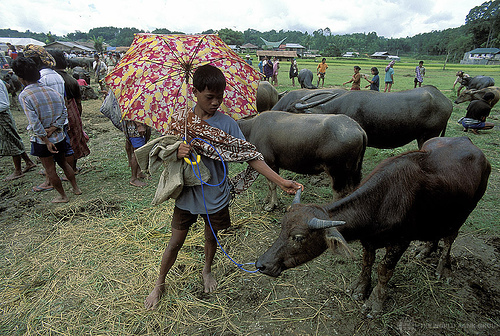

In [15]:
ds[2]['image']

In [ ]:

ds.save_to_disk("./coco_train_images")

Saving the dataset (0/1 shards):   0%|          | 0/5000 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 5000/5000 [00:02<00:00, 2163.58 examples/s] 


In [4]:
ds_val = load_from_disk("./coco_train_images")

FileNotFoundError: Directory ./coco_train_images not found

In [ ]:
from matplotlib import pyplot as plt
# plt.imshow(ds_val['image'][0])